In [320]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [321]:
os.getcwd()

'E:\\NewDataForML'

In [322]:
os.chdir("E:\\NewDataForML")

In [323]:
os.listdir()

['car data.csv']

In [324]:
df=pd.read_csv("car data.csv")

In [325]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [326]:
df.shape

(301, 9)

In [327]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [328]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [329]:
df.drop(columns=['Car_Name'],inplace=True) # droping car_name as it is a identifier

In [330]:
df.shape

(301, 8)

### EDA

* Univariate Analysis

In [331]:
def univariate_cat(x):
    missing=x.isnull().sum()
    unique_cnt=x.nunique()
    unique_cat=list(x.unique())
    print(f"Total missing values : {missing}\n")
    print(f"Total count of unique categories: {unique_cnt}\n")
    print(f"Unique categories :\n{unique_cat}")

In [332]:
univariate_cat(df['Fuel_Type'])

Total missing values : 0

Total count of unique categories: 3

Unique categories :
['Petrol', 'Diesel', 'CNG']


In [333]:
univariate_cat(df['Seller_Type'])

Total missing values : 0

Total count of unique categories: 2

Unique categories :
['Dealer', 'Individual']


In [334]:
univariate_cat(df['Transmission'])

Total missing values : 0

Total count of unique categories: 2

Unique categories :
['Manual', 'Automatic']


* As we can observe there are no missing values in Object type variables therefore no need to do Missing Value Treatment

### Outlier checking

* we are now checking for outlier in numerical type variables 

In [335]:
def univariate_num(data,x):
    missing=x.isnull().sum()
    min1=round(x.min(), 2)
    max1=round(x.max(), 2)
    mean=round(x.mean(), 2)
    var=round(x.var(), 2)
    std=round(x.std(),2)
    range1=round(max1-min1, 2)
    q1=round(x.quantile(.25), 2)
    q2=round(x.quantile(.5),2)
    q3=round(x.quantile(.75), 2)
    skew=round( x.skew(), 2)
    kurt=round(x.kurt(), 2)
    myvalue={"missing":missing, "min":min1, "max":max1, "mean":mean,
             "var":var,"std":std, "range":range1,"q1":q1, "q2":q2,"q3":q3,
            "skewness":skew, "kurtosis":kurt}
    sns.histplot(x)
    plt.show()
    sns.boxplot(data=df, y=x)
    plt.show()
    return myvalue

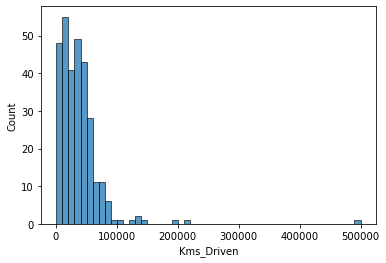

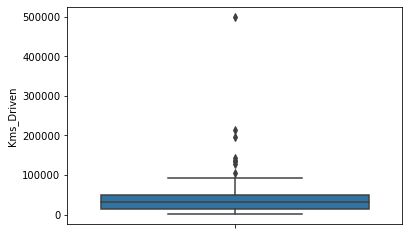

{'missing': 0,
 'min': 500,
 'max': 500000,
 'mean': 36947.21,
 'var': 1512189738.06,
 'std': 38886.88,
 'range': 499500,
 'q1': 15000.0,
 'q2': 32000.0,
 'q3': 48767.0,
 'skewness': 6.44,
 'kurtosis': 68.56}

In [336]:
univariate_num(df,df["Kms_Driven"])

In [337]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


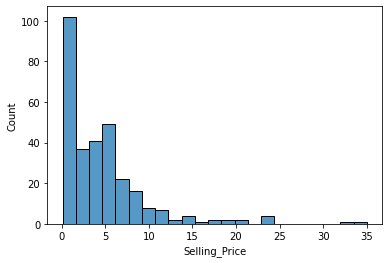

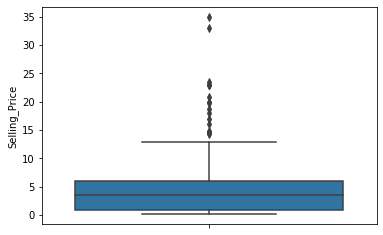

{'missing': 0,
 'min': 0.1,
 'max': 35.0,
 'mean': 4.66,
 'var': 25.83,
 'std': 5.08,
 'range': 34.9,
 'q1': 0.9,
 'q2': 3.6,
 'q3': 6.0,
 'skewness': 2.49,
 'kurtosis': 8.9}

In [338]:
univariate_num(df,df["Selling_Price"])

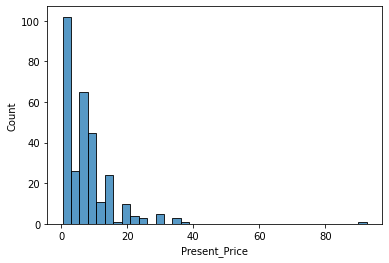

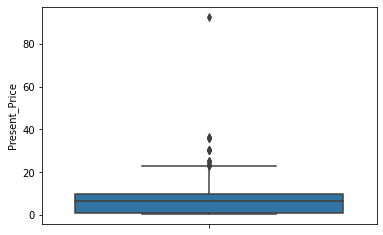

{'missing': 0,
 'min': 0.32,
 'max': 92.6,
 'mean': 7.63,
 'var': 74.72,
 'std': 8.64,
 'range': 92.28,
 'q1': 1.2,
 'q2': 6.4,
 'q3': 9.9,
 'skewness': 4.08,
 'kurtosis': 31.7}

In [339]:
univariate_num(df,df["Present_Price"])

* As it is Observed from BoxPlot that there are outlier in 'Selling_Price','Present_Price','Kms_Driven' variable 
* therfore we need to perform outlier Treatments

In [340]:
f=df.describe(percentiles=[.01,.02,.03, .04,.05,.25,.5,.75, .9,.95,.96,.97,.98,.99]).T

In [341]:
f

,count,mean,std,min,1%,2%,3%,4%,5%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
Year,301.0,2013.627907,2.891554,2003.00,2005.00,2005.00,2006.00,2007.00,2008.00,2012.0,2014.0,2016.0,2017.00,2017.00,2017.00,2017.00,2017.00,2017.00,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.16,0.20,0.20,0.25,0.25,0.9,3.6,6.0,9.50,14.50,16.00,18.75,20.75,23.00,35.0
Present_Price,301.0,7.628472,8.644115,0.32,0.51,0.51,0.52,0.52,0.54,1.2,6.4,9.9,14.79,22.78,23.73,30.61,30.61,35.96,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,1200.00,1400.00,2135.00,3000.00,3500.00,15000.0,32000.0,48767.0,65000.00,80000.00,88000.00,90000.00,127000.00,142000.00,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,1.00,1.00,1.00,3.0


* It is also evident from describe function that there are outliers in the numerical variables, since there is sudden changes in 99% percentile value and max values of numerical variables

### Creating two subdata Set one with Outlier(ie out) and another without outlier(ie not_out)

In [342]:
out=['Selling_Price','Present_Price','Kms_Driven']
out

['Selling_Price', 'Present_Price', 'Kms_Driven']

In [343]:
df_out=df[out]
df_out

,Selling_Price,Present_Price,Kms_Driven
0,3.35,5.59,27000
1,4.75,9.54,43000
2,7.25,9.85,6900
3,2.85,4.15,5200
4,4.60,6.87,42450
...,...,...,...
296,9.50,11.60,33988
297,4.00,5.90,60000
298,3.35,11.00,87934
299,11.50,12.50,9000


In [344]:
not_out=['Year',"Fuel_Type",'Transmission','Owner','Seller_Type']
not_out

['Year', 'Fuel_Type', 'Transmission', 'Owner', 'Seller_Type']

In [345]:
df_not_out=df[not_out]

In [346]:
df_not_out

,Year,Fuel_Type,Transmission,Owner,Seller_Type
0,2014,Petrol,Manual,0,Dealer
1,2013,Diesel,Manual,0,Dealer
2,2017,Petrol,Manual,0,Dealer
3,2011,Petrol,Manual,0,Dealer
4,2014,Diesel,Manual,0,Dealer
...,...,...,...,...,...
296,2016,Diesel,Manual,0,Dealer
297,2015,Petrol,Manual,0,Dealer
298,2009,Petrol,Manual,0,Dealer
299,2017,Diesel,Manual,0,Dealer


### Capping of outliers using following functions

In [347]:
def outliers_percentile(x):
    x=x.clip(upper=x.quantile(.99))
#     x=x.clip(lower=x.quantile(.01))
    return x

In [348]:
df_out1=df_out.apply(outliers_percentile) # appling outliers function on out subset

### checking if outlier are gone or not

In [349]:
# numerical variables without outliers
df_out1.describe(percentiles=[.01,.02,.03, .04,.05,.25,.5,.75, .9,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
Selling_Price,301.0,4.586545,4.718516,0.10,0.16,0.20,0.20,0.25,0.25,0.9,3.6,6.0,9.50,14.50,16.00,18.75,20.75,23.00,23.00
Present_Price,301.0,7.439402,7.296712,0.32,0.51,0.51,0.52,0.52,0.54,1.2,6.4,9.9,14.79,22.78,23.73,30.61,30.61,35.96,35.96
Kms_Driven,301.0,35338.647841,26764.442955,500.00,1200.00,1400.00,2135.00,3000.00,3500.00,15000.0,32000.0,48767.0,65000.00,80000.00,88000.00,90000.00,127000.00,142000.00,142000.00


#### check there is no sudden change in  99% percentile and max value therefore outlier are gone

In [350]:
df2=pd.concat([df_out,df_not_out],axis=1) # concatenating the out and not_out subsets

In [351]:
df2

,Selling_Price,Present_Price,Kms_Driven,Year,Fuel_Type,Transmission,Owner,Seller_Type
0,3.35,5.59,27000,2014,Petrol,Manual,0,Dealer
1,4.75,9.54,43000,2013,Diesel,Manual,0,Dealer
2,7.25,9.85,6900,2017,Petrol,Manual,0,Dealer
3,2.85,4.15,5200,2011,Petrol,Manual,0,Dealer
4,4.60,6.87,42450,2014,Diesel,Manual,0,Dealer
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,2016,Diesel,Manual,0,Dealer
297,4.00,5.90,60000,2015,Petrol,Manual,0,Dealer
298,3.35,11.00,87934,2009,Petrol,Manual,0,Dealer
299,11.50,12.50,9000,2017,Diesel,Manual,0,Dealer


### Dummy Creation

In [352]:
df2["Seller_Type"].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

#### Converting Non-numerical variable to Numerical type using Dummies

In [353]:
df2_dum=pd.get_dummies(df2,columns=['Seller_Type','Fuel_Type','Transmission'],drop_first=True) # droping the first to avoid high collinerity

In [354]:
df2_dum

,Selling_Price,Present_Price,Kms_Driven,Year,Owner,Seller_Type_Individual,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual
0,3.35,5.59,27000,2014,0,0,0,1,1
1,4.75,9.54,43000,2013,0,0,1,0,1
2,7.25,9.85,6900,2017,0,0,0,1,1
3,2.85,4.15,5200,2011,0,0,0,1,1
4,4.60,6.87,42450,2014,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,2016,0,0,1,0,1
297,4.00,5.90,60000,2015,0,0,0,1,1
298,3.35,11.00,87934,2009,0,0,0,1,1
299,11.50,12.50,9000,2017,0,0,1,0,1


#### In order to get  Age of Car using current year and Year columns

In [355]:
# to get current date and time use the following code
pd.to_datetime('today')

Timestamp('2022-09-23 18:39:37.861485')

In [356]:
# In order to get Age of car we are subtacting Car manufacturing Year from current Year and saving in another column as Year_old
df2_dum['year_old']=pd.to_datetime("today").year-df2_dum["Year"]

In [357]:
df2_dum.drop(columns=['Year'],inplace=True) # since there is age variable therfore there is no need of year of manufacturing

In [358]:
df2_dum

,Selling_Price,Present_Price,Kms_Driven,Owner,Seller_Type_Individual,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual,year_old
0,3.35,5.59,27000,0,0,0,1,1,8
1,4.75,9.54,43000,0,0,1,0,1,9
2,7.25,9.85,6900,0,0,0,1,1,5
3,2.85,4.15,5200,0,0,0,1,1,11
4,4.60,6.87,42450,0,0,1,0,1,8
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,0,1,0,1,6
297,4.00,5.90,60000,0,0,0,1,1,7
298,3.35,11.00,87934,0,0,0,1,1,13
299,11.50,12.50,9000,0,0,1,0,1,5


# collinearity
* checking  numerical data for correlation

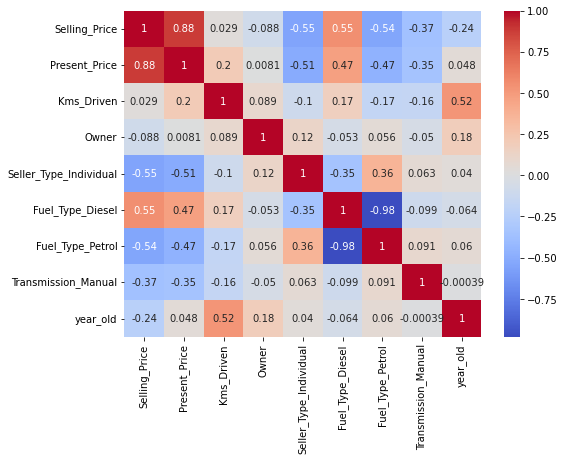

In [359]:
cr=df2_dum.corr()
plt.figure(figsize=(8,6))
sns.heatmap(cr,annot=True,cmap='coolwarm')
plt.show()

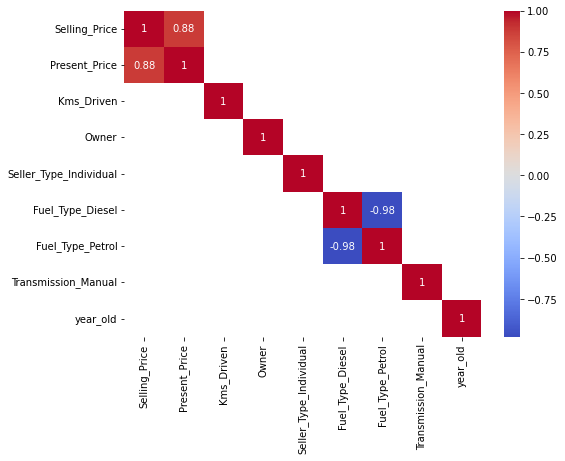

In [380]:
cr1=cr[abs(cr)>0.7]
plt.figure(figsize=(8,6))
sns.heatmap(cr1,annot=True,cmap='coolwarm')
plt.show()

### There is no strong correlation between the two numeric variable expecting selling_price and present_price

In [360]:
df2_dum.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner',
       'Seller_Type_Individual', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Transmission_Manual', 'year_old'],
      dtype='object')

In [381]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df2_dum[['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner',
       'Seller_Type_Individual', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Transmission_Manual', 'year_old']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns

# calculating VIF for each feature
vif_data['VIF'] = [variance_inflation_factor(X.values,i)
                      for i in range(len(X.columns))]
print(vif_data)

                  feature        VIF
0           Selling_Price  14.818614
1           Present_Price  11.465307
2              Kms_Driven   2.939083
3                   Owner   1.098160
4  Seller_Type_Individual   2.355717
5        Fuel_Type_Diesel   8.479080
6        Fuel_Type_Petrol  23.072107
7     Transmission_Manual   8.743340
8                year_old  16.515333


In [383]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df2_dum[['Present_Price', 'Kms_Driven', 'year_old']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns

# calculating VIF for each feature
vif_data['VIF'] = [variance_inflation_factor(X.values,i)
                      for i in range(len(X.columns))]

vif_data.sort_values(by=["VIF"], ascending=False)

,feature,VIF
2,year_old,2.934520
1,Kms_Driven,2.566379
0,Present_Price,1.723893


#### avoiding variable that are having high VIF i.e having high correlation between two variable

### Normality Test

In [363]:
from scipy.stats import shapiro
shapiro(df2_dum["Selling_Price"])

ShapiroResult(statistic=0.7606580257415771, pvalue=1.2634042444437403e-20)

ShapiroResult(statistic=0.9417944550514221, pvalue=1.6305882200029487e-09)


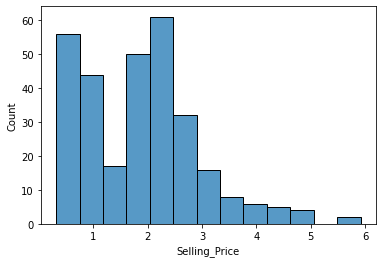

In [384]:
print(shapiro(np.sqrt(df2_dum["Selling_Price"])))

sns.histplot(np.sqrt(df2_dum["Selling_Price"]))
plt.show()

#### As it is observed that p value is less than Alpha values therefore the data is not normally distributed

### Model development
* Seperate x, y
* Split into Train and Test
* run model on Train Data and validate on train and test ( MSE, RMSE, MAE, MAPE)


x=df2_dum.drop(columns=['Selling_Price']) # it is equivalent to selecting all columns except Target variable ie (Selling_Price)
y=df2_dum['Selling_Price']                # it is selecting Target variable 

In [393]:
x=df2_dum[['Present_Price', 'Kms_Driven', 'year_old']]
y=df2_dum['Selling_Price']                # it is selecting Target variable 

In [394]:
from sklearn.model_selection import train_test_split  # Train test split
from sklearn.linear_model import LinearRegression     # Model development
from sklearn import metrics                            # Model evaluate

#### test size is specify train:test=75:25, and fixing the data in set of train data and test data using random_state=fixed value

In [395]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=.25, 
                                                  random_state=0)

### Model: Linear Regression

In [396]:
reg=LinearRegression() # what we have Called ie linearRegression , making it an object reg

# Model made using this code

reg.fit(x_train, y_train) 

LinearRegression()

#### getting weight for each variable using reg.coef_

In [402]:
reg.coef_ # these are m values we call them weights here

array([ 4.87402680e-01, -1.70484906e-07, -4.43047790e-01])

In [403]:
reg.intercept_ # this is c values 

4.528571912426832

In [404]:
X.columns

Index(['Present_Price', 'Kms_Driven', 'year_old'], dtype='object')

In [405]:
# R^2 : How much % of Variance can be explained  by this model/ variables
print("Train R^2 : ", reg.score(x_train, y_train))

Train R^2 :  0.8468316996170313


In [406]:
print("Test R^2 : ", reg.score(x_test, y_test))

Test R^2 :  0.8380664677229962


#### So R^2 for Train Data is 85.53% and Test Data is 83.38% 

In [374]:
pred_test=reg.predict(x_test)
pred_test

array([ 5.99835804,  0.05661793,  4.20122543,  7.51836182, 11.94672668,
        4.77912446,  3.40159124,  2.13818616,  3.84515048,  4.6735247 ,
        1.89325974,  2.33323248,  5.08809911,  6.26946275,  7.12202924,
       13.59482968,  6.01064062,  4.27221231,  0.16170449,  3.20016716,
        3.55061745,  4.64788495,  5.11655578,  8.49509656, -1.31877423,
        2.72189879,  0.02584576,  1.56506641,  0.57840636,  6.08755301,
        2.51157451,  5.80129285,  1.46245612,  6.19983876,  3.63111817,
        2.59990597,  5.62055771,  5.24652903, -1.31297775,  7.79708657,
        7.54719603, 18.5042001 ,  4.20466684,  4.89630388,  4.90498337,
        8.49283542,  0.81872081,  2.4395234 ,  5.35718089,  5.61807532,
        6.84996059,  4.02734798,  5.11245682, 18.94622498,  2.59832046,
        2.13928671,  0.92199995,  1.80452246,  3.39279534,  2.66291584,
        3.66138983,  5.32254528,  2.25324586, 19.97090916,  4.29289858,
        5.71589576,  7.79709642,  7.82894446,  2.5616867 ,  2.43

In [375]:
pred_train=reg.predict(x_train)
pred_train

array([ 1.36521823e+00,  8.49397954e+00, -2.79970957e+00,  2.85708435e+00,
        2.13109583e+00,  1.13970357e+01,  4.20183117e+00,  5.07525615e+00,
        5.55808967e+00,  1.25199774e+00,  4.67416879e+00,  7.68393824e+00,
        4.89650970e-01,  4.74502946e+00,  1.78706294e+00,  4.67521488e+00,
        7.62010073e+00,  1.40068298e+00,  4.66757478e+00,  3.71651417e-01,
        1.41174007e+00,  1.13987130e-01,  3.09297267e+00,  1.95779721e+00,
        3.39867049e+00,  3.90206481e+00,  1.37182540e+00,  4.74596583e+00,
        9.49088126e-01,  2.77614388e+00,  5.73015985e+00,  2.69654757e+00,
        6.00268512e+00,  2.33404724e+00,  8.49708970e+00,  4.02692177e+00,
        2.56422508e+00,  1.38286305e+00,  5.82617444e+00,  7.98119903e+00,
        2.70611741e+00,  6.26070906e+00,  9.60488612e+00,  1.83273448e+00,
        1.13546566e+00,  2.73683903e+00,  5.09599310e+00,  6.47880538e+00,
        1.69416661e+00,  6.67920683e+00,  4.96374443e+00,  4.73543815e+00,
        3.02793957e+00,  

In [376]:

y_train

146    0.55
260    9.15
37     0.35
273    2.25
164    0.45
       ... 
251    5.00
192    0.20
117    1.10
47     1.05
172    0.40
Name: Selling_Price, Length: 225, dtype: float64

In [377]:
y_test

223     8.25
150     0.50
226     5.25
296     9.50
52     18.00
       ...  
46      2.65
158     0.48
230     6.15
179     0.31
27      6.00
Name: Selling_Price, Length: 76, dtype: float64

In [378]:
print("Train MSE", np.mean((pred_train-y_train)**(2)))
print("Train rmse", np.sqrt(np.mean((pred_train-y_train)**(2))))
print("Train MAE",  np.mean(np.abs(pred_train-y_train)))
print("Train MAPE",  np.mean(np.abs((pred_train-y_train)/y_train)))

Train MSE 3.5957748796325055
Train rmse 1.8962528522410995
Train MAE 1.2627466686987732
Train MAPE 1.2324570747302817


In [379]:
print("Test MSE", np.mean((pred_test-y_test)**(2)))
print("Test rmse", np.sqrt(np.mean((pred_test-y_test)**(2))))
print("Test MAE",  np.mean(np.abs(pred_test-y_test)))
print("Test MAPE",  np.mean(np.abs((pred_test-y_test)/y_test)))

Test MSE 5.17632482166074
Test rmse 2.275153801759507
Test MAE 1.3678567755024733
Test MAPE 0.7671083525540452


## it is just statistical learning